<a href="https://colab.research.google.com/github/paularedondosastre/APRENDIZAJE_AUTOMATICO_23_24/blob/main/Pr%C3%A1ctica1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Práctica 1 - Diseño, Entrenamiento y Test de un Sistema de Redes de Neuronas Artificiales.
GRUPO A03

Lucía Casas Sierra, Alba López Devesa, Paula Redondo Sastre



### **Introducción**

 En el siguiente código, nuestro principal objetivo es desarrollar una red neuronal capaz de identificar y clasificar diversas imágenes de prendas de vestir en categorías. Se utilizará el conjunto de datos Fashion – MNIST, disponible en Keras, que presenta imágenes de prendas de ropa en escala de grises provenientes de la tienda de moda online Zalando. Para llevar a cabo este propósito, se crearán ocho modelos distintos de Red de Neuronas Artificiales con características variadas, incluyendo diferentes números de capas, funciones de activación y optimizadores.

Nuestro enfoque será identificar cuál es el modelo más adecuado para trabajar con la base de datos. Para lograrlo, compararemos el rendimiento de las ocho redes neuronales.

Durante la fase de entrenamiento, emplearemos 60.000 imágenes para enseñar a cada uno de los modelos de redes neuronales. Posteriormente, evaluaremos el rendimiento de cada red utilizando 10.000 imágenes restantes, lo que nos permitirá determinar qué configuración es la más efectiva para nuestra tarea específica de clasificación. Este proceso de experimentación y evaluación nos ayudará a definir el modelo óptimo que nos permitirá realizar clasificaciones precisas en nuestra base de datos.

In [ ]:
# Importación de librerías a utilizar
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD, RMSprop, Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import numpy as np

print("Versión de TensorFlow:", tf.__version__)

# Se carga el conjunto de datos Fashion - MNIST, el cual ya está dividido en dos
# partes: un conjunto de datos de entrenamiento y un conjunto de datos de prueba.
# Las imágenes y las etiquetas de cada conjunto están organizadas en tuplas.
# Se asignan los datos cargados a cuatro variables diferentes: 'train_images' y
# 'train_labels' contienen las imágenes y las etiquetas del conjunto de
# entrenamiento, respectivamente. 'test_images' y 'test_labels' contienen las
# imágenes del conjunto de prueba, respectivamente.
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Comprobación de la forma de los datos
print(f"Forma de las imágenes de entrenamiento:\n{train_images.shape}")
print(f"Forma de las imágenes de test:\n{test_images.shape}")


Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
Versión de TensorFlow: 2.13.0
Forma de las imágenes de entrenamiento:
(60000, 28, 28)
Forma de las imágenes de test:
(10000, 28, 28)


### **Preprocesamiento de datos**

El proceso de preparación de datos implica dos pasos cruciales: normalización y categorización.

La normalización de datos desempeña un papel fundamental en el proceso de entrenamiento de redes neuronales, ya que tiene un impacto significativo en la eficacia y la estabilidad del aprendizaje automático. Esta técnica se utiliza para ajustar y estandarizar los valores de entrada a un formato que sea compatible con el funcionamiento óptimo de la red neuronal.

En esencia, el propósito principal de la normalización es facilitar la convergencia del proceso de entrenamiento de la red. Cuando los datos de entrada presentan escalas muy distintas o una variabilidad significativa entre sí, esto puede generar dificultades durante el proceso de optimización. Los gradientes pueden volverse inestables, lo que ralentiza la convergencia o incluso impide que la red neuronal alcance un rendimiento óptimo.

En términos prácticos, se evita la alimentación de datos con valores que sean significativamente mayores o menores que los pesos de la red. Esta desigualdad en las escalas puede hacer que los pesos se actualicen de manera desproporcionada, lo que dificulta el ajuste de la red. Además, los datos heterogéneos en cuanto a su rango pueden generar problemas similares, ya que la red podría ser sensible a variaciones en algunos atributos mientras ignora otros.

La normalización de datos busca remediar estos problemas al escalar los valores de entrada de manera que tengan una media cercana a cero y una desviación estándar cercana a uno. Este enfoque tiene varios beneficios, incluida la aceleración del proceso de entrenamiento, la estabilización de la convergencia y la reducción del riesgo de sobreentrenamiento.

Por otra parte, la categorización, en nuestro caso el one-hot encoding, es esencial en el preprocesamiento de datos porque asegura una representación coherente de las etiquetas, lo que mejora la capacidad del modelo para aprender y hacer predicciones precisas en problemas de clasificación.

Transformar las etiquetas en vectores binarios también elimina ambigüedades en la interpretación de las clases, lo que mejora la capacidad del modelo para generalizar y realizar predicciones precisas. Además, es compatible con funciones de pérdida específicas (como la entropía cruzada categórica), que son fundamentales para entrenar la red de manera efectiva en problemas de clasificación.

Además, las redes neuronales utilizan funciones de activación como softmax, que operan mejor con salidas en formato de vectores de probabilidad. La categorización asegura que las salidas de la red estén en este formato, permitiendo una interpretación sencilla y una comparación clara de las probabilidades de pertenencia a diferentes clases.

In [ ]:
# Se reorganizan los datos para que cada imagen sea tratada como una matriz
# tridimensional de 28x28 píxeles con un solo canal de color (ya que las
# imágenes son en escala de grises). La forma resultante es (60000, 28, 28, 1).
# Después se convierten los valores de los píxeles de las imágenes a número de
# punto flotante de 32 bits. Por último, se normalizan los valores de los
# píxeles dividiéndolos por 255, lo que escala los valores de píxeles a un rango
# entre 0 y 1.
# Normalizar los datos suele ayudar a acelerar el entrenamiento del modelo.
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

# Se convierten las etiquetas a un formato de representación one-hot encoding.
# De esta manera, cada valor de la etiqueta se convierte en un vector donde todas
# las posiciones están en cero, excepto la posición que representa la clase que
# se marca con un 1.
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


### **1. Configuración y entrenamiento de los modelos**

**Número de neuronas**

La determinación del número de neuronas en la primera capa de un modelo de red neuronal constituye una decisión fundamental en la arquitectura de la red y tiene un impacto significativo en su capacidad para aprender y generalizar a partir de los datos. Esta elección es crucial por varias razones. En primer lugar, establecer un número adecuado de neuronas permite que la red aprenda características y patrones complejos presentes en los datos de entrada. Si este número es insuficiente, la red podría no tener la capacidad para capturar la complejidad del conjunto de datos, lo que conllevaría a un subajuste, donde el modelo es demasiado simplista. En cambio, si el número de neuronas es excesivo, existe el riesgo de sobreajuste, donde la red memoriza los datos de entrenamiento en lugar de aprender patrones generales, lo cual afecta negativamente la capacidad del modelo para generalizar en datos no vistos.

Además, la eficiencia computacional es otra consideración importante. Asignar un gran número de neuronas en la primera capa resulta en una mayor carga computacional y demanda de memoria. En aplicaciones prácticas, encontrar un equilibrio entre la precisión del modelo y los recursos computacionales disponibles es esencial para asegurar un rendimiento óptimo del sistema.

Adicionalmente, la elección del número de neuronas en la primera capa también tiene implicaciones en la representación jerárquica de las características. Las primeras capas de una red neuronal tienden a aprender características de bajo nivel y simples, mientras que las capas más profundas pueden aprender características más abstractas y complejas. Por lo tanto, una cantidad adecuada de neuronas en la primera capa facilita la captura tanto de características simples como complejas, permitiendo así una representación jerárquica eficaz de los datos.

**Función de activación**

La función de activación en una red neuronal es una función matemática que determina la salida de cada neurona y decide si esta debe activarse o no, es decir, si debe transmitir su información a las neuronas siguientes en la red.
En esencia, la función agrega las entradas ponderadas de la neurona y le aplica una transformación no lineal, lo que introduce no linealidades en el modelo.

Esta activación no lineal es muy importante, ya que muchos problemas del mundo real implican relaciones intrínsecamente no lineales entre las variables involucradas. Concretamente, el problema de reconocimiento de imágenes se basa en relaciones que son inherentemente no lineales, por lo que las funciones de activación no lineales son esenciales para que la red pueda aprender y generalizar adecuadamente.  
Si se utilizaran funciones de activación lineales, la red sería equivalente a una sola capa lineal, limitando su capacidad para aprender patrones complejos y realizar tareas sofisticadas de aprendizaje automático.

En el caso que nos ocupa, vamos a trabajar con dos funciones de activación comúnmente utilizadas en redes neuronales para introducir no linealidades en el modelo, estas son las funciones ReLu (Rectified Linear Unit) y Sigmoid.

La función ReLu transforma las entradas de manera que, si la entrada es positiva devuelve esa misma entrada, pero si la entrada es negativa devuelve cero. Esta función es popular debido a su simplicidad y su capacidad para mitigar el problema del desvanecimiento del gradiente, un problema que puede surgir durante el entrenamiento de redes neuronales profundas. La función ReLU introduce no linealidades al permitir que las neuronas se activen solo cuando la entrada es positiva, lo que le permite aprender y representar patrones complejos en los datos.

La función sigmoide, también conocida como función logística, mapea los valores de entrada a un rango entre 0 y 1. Cuando la entrada es grande y positiva, la función sigmoide se aproxima a 1, y cuando la entrada es grande y negativa, se aproxima a 0. Esta función es comúnmente utilizada en la capa de salida de una red neuronal para problemas de clasificación binaria, ya que puede interpretarse como la probabilidad de que la entrada pertenezca a una de las dos clases. Sin embargo, debido a su naturaleza saturante (cuando los valores son extremadamente positivos o negativos, la pendiente de la función es casi cero), la función sigmoide puede conducir al problema del desvanecimiento del gradiente en redes neuronales profundas.

**Optimizador**

El optimizador es un algoritmo que ajusta los pesos y sesgos de las conexiones entre las neuronas durante el proceso de entrenamiento. Su objetivo principal es minimizar la función de pérdida, que mide la diferencia entre las predicciones del modelo y las etiquetas reales de los datos de entrenamiento. El optimizador es responsable de guiar la red neuronal para que aprenda de manera efectiva y mejore su rendimiento en las tareas específicas para las que está siendo entrenada.

Un buen optimizador desempeña un papel crucial en el entrenamiento de la red neuronal. No solo permite una convergencia eficiente hacia una solución óptima, sino que también contribuye a la estabilidad del entrenamiento. Además, ayuda a evitar el sobreajuste y facilita el mejoramiento del rendimiento del modelo. La elección adecuada del optimizador es esencial para garantizar un proceso de entrenamiento efectivo, rápido y que permita al modelo generalizar de manera precisa a datos nuevos. Cada problema y arquitectura de red pueden requerir un optimizador específico para lograr los mejores resultados posibles.

SGD (Stochastic Gradient Descent) es uno de los optimizadores más básicos y fundamentales en el aprendizaje profundo. Funciona ajustando los pesos de la red neuronal en función del gradiente de la función de pérdida con respecto a los datos de entrenamiento. Sin embargo, a diferencia del descenso del gradiente clásico que calcula el gradiente utilizando el conjunto de datos completo, el SGD calcula el gradiente y ajusta los pesos utilizando solo un subconjunto (batch) de datos en cada iteración. Esto hace que el proceso sea más rápido y menos intensivo computacionalmente.
El enfoque estocástico, donde se utilizan lotes pequeños y aleatorios de datos en lugar del conjunto de datos completo, permite que el SGD escape de óptimos locales y converge hacia una solución más amplia. Sin embargo, puede ser más ruidoso y menos estable debido a la variabilidad introducida por el uso de lotes pequeños de datos.


RMSprop (Root Mean Square Propagation) es un optimizador adaptativo que ajusta la tasa de aprendizaje para cada parámetro de la red de forma individual. Lo que hace es calcular un promedio ponderado de los cuadrados de los gradientes anteriores y utilizar esta información para adaptar la tasa de aprendizaje de cada parámetro. Esto significa que los parámetros con gradientes grandes tendrán tasas de aprendizaje más pequeñas, mientras que los parámetros con gradientes pequeños tendrán tasas de aprendizaje más grandes. Esta adaptación individualizada de las tasas de aprendizaje hace que RMSprop sea efectivo para problemas con datos ruidosos o no estandarizados, ya que puede ajustar automáticamente las tasas de aprendizaje según la escala de los gradientes. Además, ayuda a mitigar los problemas de convergencia que pueden surgir cuando se utilizan tasas de aprendizaje fijas en el SGD estándar.



**Función Flatten**

La función `Flatten()` de Keras se va a utilizar en todos los modelos creados a continuación para aplanar los datos, es decir, se van a transformar las estructuras de datos multidimensionales en una forma unidimensional. Esto es necesario porque los datos con los que se trabaja son imágenes, las cuales tienen dimensiones espaciales, pero se requieren en un formato plano para ciertas capas de la red neuronal, como las capas completamente conectadas (densamente conectadas) que están al final del modelo.

Si consideramos imágenes en un conjunto de datos con dimensiones (ancho, alto, canales), después de pasar estas imágenes a través de capas de convolución y agrupación, se obtendrá un tensor tridimensional. Para conectar estas capas convolucionales a capas densamente conectadas, es necesario aplanar los datos para convertirlos en un vector unidimensional, y esto se hace con la función `Flatten()`.

Por lo tanto, el uso de `Flatten()` es fundamental para permitir la transición de las capas convolucionales a las capas completamente conectadas, lo que es común en muchas arquitecturas de redes neuronales convolucionales (CNN). Esta función garantiza que los datos se presenten de una manera compatible con las capas posteriores del modelo, permitiendo así que la red aprenda patrones complejos y realice predicciones precisas.


In [ ]:
# Configuración de parámetros

# 'neuronas_capa_1' es una lista que contiene el número de neuronas en la primera
# capa de cada modelo. Se especifican 10 neuronas para los primeros cuatro modelos
# y 512 para los siguientes cuatro.
neuronas_capa_1 = [10] * 4 +  [512] * 4
# 'funciones_activacion' es una lista que contiene las funciones de activación
# para las capas ocultas de cada modelo. Se utilizan 'relu' para los primeros dos
# modelos y 'sigmoid' para los siguientes dos, y esta secuencia se repite dos veces
# para los ocho modelos en total.
funciones_activacion = (['relu'] * 2 + ['sigmoid'] * 2) * 2
# 'optimizadores' es una lista que contiene los optimizadores que se utilizarán
# para compilar cada modelo. Se alternan entre 'sgd' (descenso de gradiente
# estocástico) y 'rmsprop' (propagación de la media cuadrática de las raíces)
# para los ocho modelos.
optimizadores = ['sgd', 'rmsprop'] * 4



# Se inicializa una lista vacía 'models' que se utilizará para almacenar todos
# los modelos.
models = []

# Bucle para crear y entrenar los modelos
# Para cada iteración, se crea un modelo secuencial de Keras que consiste en tres
# capas (En un modelo secuencial los datos de entrada fluyen a través de cada
# capa en orden, desde las capas iniciales hasta las capas de salida, sin
# conexiones que se salten capas intermedias y sin formar bucles).
# La primera capa 'Flatten' aplanará las imágenes de entrada que tienen
# dimensiones (28, 28, 1) a un vector unidimensional. La segunda capa es una
# capa densamente conectada con el número de neuronas y función de activación
# específicos para cada caso. La tercera capa es también una capa densamente
# conectada con 10 neuronas (correspondientes a las 10 clases en el problema de
# clasificación) y utiliza la función de activación 'softmax'.
# La razón principal para utilizar softmax en la capa de salida es que proporciona
# una forma adecuada de interpretar las salidas del modelo como probabilidades.
# Esto es crucial en problemas de clasificación multiclase, donde se debe asignar
# una instancia de entrada a una de varias categorías posibles. Al convertir las
# puntuaciones asociadas a cada clase en probabilidades normalizadas, la función
# softmax asegura que la suma de todas las probabilidades sea igual a 1, lo que
# facilita la interpretación de las salidas del modelo como una distribución de
# probabilidad.
# Además, al utilizar softmax en la capa de salida, se puede aplicar la función
# de pérdida de entropía cruzada categórica (categorical cross-entropy loss)
# durante el entrenamiento. Esta función de pérdida es adecuada para problemas
# de clasificación multiclase y ayuda a minimizar la discrepancia entre las
# distribuciones de probabilidad predichas por el modelo y las distribuciones
# reales de las clases objetivo.

for i in range(8):
    model = Sequential([
        Flatten(input_shape=(28, 28, 1)),
        Dense(neuronas_capa_1[i], activation=funciones_activacion[i]),
        Dense(10, activation='softmax')
    ])

    # Después de definir la estructura del modelo, se compila utilizando el
    # optimizador especificado para cada caso, la función de pérdida
    # 'categorical_crossentropy (ya que es un problema de clasificación múltiple)
    # y se mide la precisión durante el entrenamiento con la métrica 'accuracy'.

    model.compile(optimizer=optimizadores[i], loss='categorical_crossentropy',
                  metrics=['accuracy'])
    print(f'\nEntrenamiento de la red neuronal para el modelo {i+1}\n')

    # El modelo se entrena a lo largo de todo el conjunto de datos 5 veces (épocas),
    # y se utilizarán lotes de 64 imágenes para calcular el gradiente y actualizar
    # los pesos del modelo en cada iteración.
    # Además, añadimos el parámetro 'validation_split' para indicar qué proporción
    # del conjunto de datos de entrenamiento se debe utilizar como conjunto de
    # validación durante el entrenamiento. En este caso, el 20% de los datos de
    # entrenamiento se reservan para evaluar el rendimiento del modelo en datos
    # que no ha visto durante el entrenamiento. Esto es útil para controlar el
    # overfitting.
    model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.2)

    # Después de cada entrenamiento, el modelo se añade a la lista 'models'.
    models.append(model)



Entrenamiento de la red neuronal para el modelo 1

Epoch 1/5
750/750 [==============================] - 3s 4ms/step - loss: 1.3427 - accuracy: 0.5464 - val_loss: 0.8365 - val_accuracy: 0.6992
Epoch 2/5
750/750 [==============================] - 3s 3ms/step - loss: 0.7543 - accuracy: 0.7305 - val_loss: 0.6907 - val_accuracy: 0.7539
Epoch 3/5
750/750 [==============================] - 3s 4ms/step - loss: 0.6494 - accuracy: 0.7747 - val_loss: 0.6137 - val_accuracy: 0.7849
Epoch 4/5
750/750 [==============================] - 2s 3ms/step - loss: 0.5909 - accuracy: 0.7970 - val_loss: 0.5730 - val_accuracy: 0.7983
Epoch 5/5
750/750 [==============================] - 3s 3ms/step - loss: 0.5530 - accuracy: 0.8090 - val_loss: 0.5441 - val_accuracy: 0.8083

Entrenamiento de la red neuronal para el modelo 2

Epoch 1/5
750/750 [==============================] - 3s 4ms/step - loss: 0.8002 - accuracy: 0.7211 - val_loss: 0.5461 - val_accuracy: 0.8086
Epoch 2/5
750/750 [==============================]

**Análisis y reflexión sobre los resultados**

En el análisis de los resultados de los ocho modelos de redes neuronales, se observan diferencias significativas en términos de rendimiento. A continuación se determina cuál es el mejor y cuál es el peor.

Modelo 1:

* Precisión de Entrenamiento (Época 5): 81.73%
* Precisión de Validación (Época 5): 81.77%

Este modelo muestra un progreso constante en términos de precisión tanto en el conjunto de entrenamiento como en el de validación. No hay signos de sobreajuste ni subajuste.

Modelo 2:

* Precisión de Entrenamiento (Época 5): 85.34%
* Precisión de Validación (Época 5): 84.87%

Este modelo también muestra mejoras constantes en precisión tanto en entrenamiento como en validación, indicando un buen aprendizaje y capacidad para generalizar. Los resultados son mejores que el modelo anterior.

Modelo 3:

* Precisión de Entrenamiento (Época 5): 66.47%
* Precisión de Validación (Época 5): 68.18%

Aunque la precisión mejora con el tiempo, siendo el modelo que más diferencia presenta entre la primera y la última época, esta red comienza con una precisión demasiado baja y no muestra un progreso suficiente para alcanzar al resto de modelos.

Modelo 4:

* Precisión de Entrenamiento (Época 5): 84.06%
* Precisión de Validación (Época 5): 84.04%

Similar al modelo 2, tiene un buen rendimiento tanto en entrenamiento como en validación. La precisión en este modelo mejora significativamente durante las primeras épocas.

Modelo 5:

* Precisión de Entrenamiento (Época 5): 83.98%
* Precisión de Validación (Época 5): 83.17%

Aunque la precisión es relativamente alta, este modelo muestra un progreso más lento en la validación en comparación con otros modelos, indicando un posible estancamiento en el aprendizaje.

Modelo 6:

* Precisión de Entrenamiento (Época 5): 89.07%
* Precisión de Validación (Época 5): 88.30%

Este modelo muestra muy buen rendimiento, con una alta precisión tanto en entrenamiento como en validación, indicando una capacidad sólida para aprender patrones complejos.

Modelo 7:

*   Precisión de Entrenamiento (Época 5): 77.15%
*   Precisión de Validación (Época 5): 77.88%

Aunque este modelo tiene una precisión relativamente alta, muestra un progreso lento en comparación con otros modelos, sugiriendo que podría beneficiarse de un entrenamiento adicional.

Modelo 8:
* Precisión de Entrenamiento (Época 5): 87.19%
* Precisión de Validación (Época 5): 85.90%

Este modelo muestra una alta precisión tanto en entrenamiento como en validación, indicando un buen aprendizaje y capacidad para generalizar.



En resumen, tras evaluar el desempeño de los diferentes modelos, se puede concluir que el modelo 6 se destaca como el mejor en términos de precisión tanto en el conjunto de entrenamiento como en el de validación. Contrariamente, el modelo 3 exhibe la precisión más baja tanto en el entrenamiento como en la validación, situándolo como el peor modelo del conjunto analizado.

Además, es notable observar que tanto el modelo 8 como el modelo 2 han demostrado un rendimiento considerablemente bueno, mostrando resultados similares al modelo 6. Este fenómeno se atribuye al uso del optimizador RMSprop en estos modelos, enfatizando la función crucial que desempeña el optimizador en el comportamiento global y el rendimiento de los modelos de redes neuronales.

En contraposición, los modelos menos efectivos resultan ser el 3, 7 y 1, respectivamente. Es interesante notar que todos estos modelos emplean el optimizador SGD. Esta consistente relación entre el rendimiento del modelo y el tipo de optimizador utilizado subraya la importancia vital de la elección del optimizador en el desarrollo y el rendimiento final de los modelos de redes neuronales.

En relación con las funciones de activación, es evidente que los dos modelos más exitosos (6 y 2) hacen uso de la función de activación ReLU, mientras que los dos modelos menos efectivos (3 y 7) se valen de la función de activación sigmoidea.

Por último, en lo que respecta al número de neuronas en la capa de entrada, se destaca que dos de los modelos más sobresalientes (6 y 8) hacen uso de 512 neuronas, mientras que dos de los modelos menos efectivos (3 y 1) emplean únicamente 10 neuronas en esta capa.

En resumen, los resultados evidencian que la configuración de parámetros más efectiva para este conjunto de datos en particular consiste en emplear 512 neuronas en la capa de entrada, la función de activación ReLU y el optimizador RMSprop. Por otro lado, la peor combinación de parámetros se caracteriza por el uso de 10 neuronas en la capa de entrada, la función de activación sigmoidea y el optimizador SGD.

### **2. Explicar la salida de la llamada model.summary() de cada uno de los 8 casos**

`summary()` es un método que pertenece a los modelos de Keras en TensorFlow. Muestra una descripción concisa de la arquitectura del modelo, incluyendo el tipo de capas, el tamaño de la salida de cada capa, el número de parámetros entrenables y el número total de parámetros en el modelo.

En primer lugar se indica que el modelo es de tipo secuencial. En segundo lugar se muestra un resumen de las capas. Por último se muestra el número total de parámetros.


**Resumen del Modelo 1 al 4:**

Todos estos modelos siguen la misma estructura básica. Comienzan con una capa de entrada que aplana los datos de entrada de forma bidimensional (28x28 píxeles) en un vector unidimensional (784 píxeles). Esta capa no tiene parámetros entrenables porque simplemente transforma los datos de entrada sin aprender ningún peso.

A continuación se encuentra la primera capa densa, esta es una capa completamente conectada donde cada uno de los 784 elementos del vector de entrada se conecta con cada uno de los 10 elementos de salida. Los 784 elementos de entrada multiplicados por las 10 neuronas de salida y sumando los 10 sesgos asociados a cada neurona contribuyen a un total de 7850 parámetros entrenables en esta capa.

Por último se encuentra la segunda capa densa, que tiene 10 elementos de entrada y 10 elementos de salida, y sumando los sesgos resulta en 110 parámetros entrenables.

En total, estos modelos tienen 7960 parámetros, incluyendo los pesos y los sesgos, y ocupa 31.09 kilobytes de espacio en memoria. Todos estos parámetros son entrenables y no hay ningún parámetro no entrenable. Estos modelos son bastante sencillos, con una capa de entrada y dos capas densas.

**Resumen del Modelo 5 al 8:**

Estos modelos también comienzan con una capa de entrada que aplana los datos de entrada bidimensionales en un vector unidimensional de 784 píxeles. Luego, tienen una capa densa con 512 unidades. Esta capa contiene 401920 parámetros entrenables, resultado de conectar cada nodo de salida (512 nodos de salida) a cada nodo de entrada (784 nodos de entrada) y sumarle los 512 sesgos asociados a las neuronas. Posteriormente, le sigue una segunda capa densamente conectada. Con 512 nodos de entrada y 10 nodos de salida, representando las 10 clases posibles. Esta capa tiene 5130 parámetros entrenables, resultado de multiplicar las salidas por las entradas y sumar los sesgos (10 * 512 + 10).
Estos modelos son más complejos debido a las 512 unidades en la primera capa oculta, lo que aumenta el número de parámetros significativamente. Tienen un total de 407,050 parámetros, lo que equivale a 1.55 megabytes de almacenamiento.



Este resumen proporciona una visión detallada de cómo los datos se transforman y fluyen a través de las diferentes capas del modelo, mostrando el número de parámetros asociados con cada capa específica. Estos parámetros son fundamentales para el proceso de aprendizaje del modelo durante el entrenamiento.

In [ ]:
# Bucle para mostrar un resumen de cada modelo
for idx, model in enumerate(models):
    print(f"Resumen del Modelo {idx + 1}:")
    model.summary()


Resumen del Modelo 1:
Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_11 (Flatten)        (None, 784)               0         
                                                                 
 dense_22 (Dense)            (None, 10)                7850      
                                                                 
 dense_23 (Dense)            (None, 10)                110       
                                                                 
Total params: 7960 (31.09 KB)
Trainable params: 7960 (31.09 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Resumen del Modelo 2:
Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_12 (Flatten)        (None, 784)               0         
                  

### **3. Analizar e interpretar los resultados del caso 2 y el 7 frente a sus originales si se multiplica por 5 las épocas de entrenamiento (25)**


Aumentar el número de épocas en el entrenamiento de un modelo de red neuronal conlleva diversas implicaciones. En términos positivos, este enfoque puede resultar en mejoras significativas en la precisión del modelo, especialmente en conjuntos de datos complejos y extensos. Además, proporciona al modelo la oportunidad de aprender patrones más intrincados en los datos de entrenamiento, lo que puede facilitar una mejor generalización a datos nuevos y desconocidos, siempre que se evite el sobreajuste. Además, un mayor número de épocas puede ayudar al modelo a converger hacia un mínimo global en la función de pérdida.

Sin embargo, este enfoque también presenta desventajas significativas. El sobreajuste es uno de los principales riesgos al incrementar las épocas, ya que el modelo puede aprender patrones específicos de los datos de entrenamiento que no son aplicables a nuevos datos. Además, este proceso es computacionalmente costoso, especialmente con conjuntos de datos grandes y modelos complejos, lo que resulta en un aumento en el tiempo y los recursos necesarios para el entrenamiento. Además, un modelo entrenado durante un mayor número de épocas puede volverse menos estable y más sensible a las variaciones en los datos de entrenamiento, lo que puede llevar a resultados menos consistentes.

Durante el proceso de entrenamiento, es fundamental monitorear continuamente las métricas de entrenamiento y validación. Si la precisión en los datos de validación deja de mejorar o comienza a deteriorarse mientras la precisión en los datos de entrenamiento continúa mejorando, puede ser indicativo de sobreajuste, lo que sugiere la necesidad de detener el entrenamiento o ajustar las técnicas de regularización correspondientes.

A continuación, se muestran los resultados de multiplicar por 5 las épocas de entrenamiento en los modelos 2 y 7.

In [ ]:
# Definir y entrenar el modelo del Caso 2 con 25 épocas
model_case2_updated = Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(10, activation='relu'),
    Dense(10, activation='softmax')
])

model_case2_updated.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model_case2_updated.fit(train_images, train_labels, epochs=25, batch_size=64, validation_split=0.2)


# Definir y entrenar el modelo del Caso 7 con 25 épocas
model_case7_updated = Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(10, activation='sigmoid'),
    Dense(10, activation='softmax')
])

model_case7_updated.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
model_case7_updated.fit(train_images, train_labels, epochs=25, batch_size=64, validation_split=0.2)

# Evaluar los modelos en el conjunto de prueba
loss_case2_original, acc_case2_original = models[1].evaluate(test_images, test_labels, verbose=2)
loss_case2_updated, acc_case2_updated = model_case2_updated.evaluate(test_images, test_labels, verbose=2)
loss_case7_original, acc_case7_original = models[6].evaluate(test_images, test_labels, verbose=2)
loss_case7_updated, acc_case7_updated = model_case7_updated.evaluate(test_images, test_labels, verbose=2)

# Imprimir resultados
print("Caso 2 Original - Precisión en datos de prueba: {:.2f}%".format(acc_case2_original * 100))
print("Caso 2 Actualizado (25 épocas) - Precisión en datos de prueba: {:.2f}%".format(acc_case2_updated * 100))
print("Caso 7 Original - Precisión en datos de prueba: {:.2f}%".format(acc_case7_original * 100))
print("Caso 7 Actualizado (25 épocas) - Precisión en datos de prueba: {:.2f}%".format(acc_case7_updated * 100))


Epoch 1/25
750/750 [==============================] - 3s 3ms/step - loss: 0.7781 - accuracy: 0.7372 - val_loss: 0.5501 - val_accuracy: 0.8146
Epoch 2/25
750/750 [==============================] - 3s 4ms/step - loss: 0.5085 - accuracy: 0.8284 - val_loss: 0.4814 - val_accuracy: 0.8348
Epoch 3/25
750/750 [==============================] - 3s 3ms/step - loss: 0.4679 - accuracy: 0.8409 - val_loss: 0.4738 - val_accuracy: 0.8374
Epoch 4/25
750/750 [==============================] - 2s 3ms/step - loss: 0.4476 - accuracy: 0.8456 - val_loss: 0.4544 - val_accuracy: 0.8436
Epoch 5/25
750/750 [==============================] - 2s 3ms/step - loss: 0.4328 - accuracy: 0.8512 - val_loss: 0.4374 - val_accuracy: 0.8499
Epoch 6/25
750/750 [==============================] - 3s 3ms/step - loss: 0.4219 - accuracy: 0.8547 - val_loss: 0.4380 - val_accuracy: 0.8484
Epoch 7/25
750/750 [==============================] - 3s 4ms/step - loss: 0.4139 - accuracy: 0.8568 - val_loss: 0.4263 - val_accuracy: 0.8518
Epoch 

Multiplicar por 5 el número de épocas en los modelos 2 y 7 ha tenido un impacto discernible en sus respectivas capacidades de aprendizaje y generalización, como se observa en las métricas de precisión en los datos de prueba.

*   **Caso 2**: Originalmente este modelo tenía una precisión del 83.94% y al aumentar el número de época a 25, la precisión mejoró de manera leve pero significativa, alcanzando un 84.80%. Además de una mayor precisión, también se consigue menor pérdida y menor tiempo de ejecución por época, por lo que los pasos de entrenamiento son más rápidos. Aun así, el tiempo de ejecución total es bastante mayor que el modelo con 5 épocas. Esto indica que el modelo 2 continuó aprendiendo patrones en los datos de entrenamiento durante las épocas adicionales, lo que resultó en una ligera mejora en su capacidad para hacer predicciones precisas en nuevos datos.


*   **Caso 7**: Originalmente este modelo tenía una precisión del 76.80% y al aumentar el número de épocas a 25, la precisión mejoró significativamente a un 79.66%. En este caso, el modelo actualizado tiene menor pérdida y una precisión más alta que el modelo original. Sin embargo, es interesante notar que en cuanto al tiempo de entrenamiento por época y por paso, no se observan cambios significativos en comparación con el modelo original. Esto sugiere que la eficiencia del proceso de entrenamiento se mantiene constante.

En resumen, en ambos conjuntos de comparaciones, los modelos con un mayor número de épocas superan a los modelos con menos épocas en términos de pérdida y precisión en datos de prueba. Además, los modelos con más épocas son más eficientes en términos de tiempo de entrenamiento por época y por paso. Esto sugiere que el entrenamiento durante más épocas puede mejorar el rendimiento de los modelos sin comprometer la eficiencia del tiempo de entrenamiento.
Sin embargo, es importante tener en cuenta el costo computacional adicional asociado con un mayor número de épocas, ya que puede no ser justificado por mejoras marginales en la precisión. La optimización debe tener en cuenta tanto la precisión del modelo como la eficiencia computacional para determinar el número óptimo de épocas en el entrenamiento de una red neuronal.




### **4. Evaluar el rendimiento en el conjunto de datos de prueba**

In [ ]:
for idx, model in enumerate(models):
    test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
    print(f"Modelo {idx + 1} - Precisión en datos de prueba: {test_acc * 100:.2f}%")


313/313 - 1s - loss: 0.5667 - accuracy: 0.7999 - 632ms/epoch - 2ms/step
Modelo 1 - Precisión en datos de prueba: 79.99%
313/313 - 1s - loss: 0.4700 - accuracy: 0.8394 - 644ms/epoch - 2ms/step
Modelo 2 - Precisión en datos de prueba: 83.94%
313/313 - 1s - loss: 1.0552 - accuracy: 0.6914 - 611ms/epoch - 2ms/step
Modelo 3 - Precisión en datos de prueba: 69.14%
313/313 - 1s - loss: 0.4985 - accuracy: 0.8242 - 615ms/epoch - 2ms/step
Modelo 4 - Precisión en datos de prueba: 82.42%
313/313 - 1s - loss: 0.4909 - accuracy: 0.8329 - 625ms/epoch - 2ms/step
Modelo 5 - Precisión en datos de prueba: 83.29%
313/313 - 1s - loss: 0.3634 - accuracy: 0.8714 - 613ms/epoch - 2ms/step
Modelo 6 - Precisión en datos de prueba: 87.14%
313/313 - 1s - loss: 0.6679 - accuracy: 0.7680 - 625ms/epoch - 2ms/step
Modelo 7 - Precisión en datos de prueba: 76.80%
313/313 - 1s - loss: 0.3951 - accuracy: 0.8573 - 705ms/epoch - 2ms/step
Modelo 8 - Precisión en datos de prueba: 85.73%


Estos resultados muestran las métricas de rendimiento de ocho modelos diferentes de redes neuronales en un conjunto de datos de prueba. La métrica clave utilizada para evaluar el rendimiento de cada modelo es la precisión (accuracy), que indica el porcentaje de muestras clasificadas correctamente. Además, se proporcionan las pérdidas (loss) y el tiempo de entrenamiento para cada modelo.

Como podemos ver, los resultados obtenidos al evaluar el modelo con las imágenes de test son muy parecidos a los resultados obtenidos anteriormente con la validación que utilizaba el 20% de los datos de entrenamiento.

**Modelo 1 - Precisión: 79.99%, Pérdida: 0.5667**
   - Este modelo tiene una precisión del 79.99%, lo que significa que puede clasificar correctamente casi el 80% de los datos de prueba. La pérdida de 0.5667 indica que este modelo tiene dificultades para ajustarse a los datos de entrenamiento, lo que se refleja en su capacidad de generalización relativamente baja.


**Modelo 2 - Precisión: 83.94%, Pérdida: 0.4700**
   - Con una precisión del 83.94%, este modelo mejora significativamente en comparación con el Modelo 1. La pérdida más baja (0.4700) indica que este modelo ha aprendido patrones más efectivos durante el entrenamiento, lo que resulta en una mejor capacidad para hacer predicciones precisas en nuevos datos.
  
**Modelo 3 - Precisión: 69.14%, Pérdida: 1.0552**
   - Este modelo tiene una precisión del 69.14%, que es la más baja de todos los modelos. La pérdida extremadamente alta (1.0552) sugiere que el modelo no ha logrado aprender patrones complejos en los datos de entrenamiento y, por lo tanto, no puede generalizar bien a los datos de prueba.
  

**Modelo 4 - Precisión: 82.42%, Pérdida: 0.4985**
   - Con una precisión del 82.42%, este modelo demuestra un buen rendimiento. La pérdida de 0.4985 indica que el modelo ha logrado un equilibrio decente entre ajustarse a los datos de entrenamiento y generalizar a nuevos datos.

**Modelo 5 - Precisión: 83.29%, Pérdida: 0.4909**
   - Similar al Modelo 2 en precisión, este modelo también alcanza un 83.29%. La pérdida de 0.4909 es comparable a la del Modelo 2, lo que sugiere una capacidad de generalización efectiva en este modelo.


**Modelo 6 - Precisión: 87.14%, Pérdida: 0.3634**
   - Este modelo sobresale con la precisión más alta (87.14%) entre todos los modelos evaluados. La pérdida extremadamente baja (0.3634) indica que el modelo ha aprendido patrones muy precisos y complejos en los datos de entrenamiento, lo que se traduce en una excelente capacidad de generalización. Además, el tiempo de entrenamiento es el más rápido (613ms/epoch).

**Modelo 7 - Precisión: 76.80%, Pérdida: 0.6679**
   - Aunque tiene una precisión del 76.80%, este modelo muestra un rendimiento inferior en comparación con otros. La pérdida de 0.6679 indica dificultades en la generalización, lo que le convierte en el segundo peor modelo.

**Modelo 8 - Precisión: 85.73%, Pérdida: 0.3951**
   - Con una precisión del 85.73%, este modelo muestra un buen rendimiento en comparación con la mayoría de los modelos. La pérdida de 0.3951 es bastante baja, lo que indica que este modelo ha aprendido patrones complejos en los datos de entrenamiento y puede aplicarlos efectivamente a los datos de prueba. Sin embargo, no llega a ser mejor que el modelo 6, por lo que se colocaría como el segundo mejor modelo.


Cabe mencionar que la pérdida es una medida relativa y debe evaluarse junto con el contexto del problema y la naturaleza de los datos. En general una pérdida menor a 0.50 no se considera alta para muchos problemas de clasificación.  En el contexto del problema de clasificación de imágenes, especialmente para conjuntos de datos grandes y complejos como Fashion – MNIST,  donde las imágenes son relativamente pequeñas y de baja resolución, una pérdida menor a 0.5 no sería considerada alta, especialmente si se están utilizando arquitecturas de red neuronal convolucional (CNN) estándar.

Una pérdida de por ejemplo 0.4985 indica que, en promedio, las predicciones del modelo están relativamente cerca de las etiquetas reales. En otras palabras, el modelo está acertando en su clasificación en aproximadamente el 50.15% de las instancias (100% - 49.85%).

Teniendo todo esto en cuenta, podemos asegurar que el mejor modelo es el número 6, pues su nivel de precisión es el más alto de todos y la pérdida es la más baja de todas. El modelo 8 también es bastante sólido en cuanto a rendimiento, tiene un nivel de precisión que ronda el 85% y una pérdida relativamente baja, sería una muy buena segunda opción como modelo a aplicar en esta base de datos.

Por otro lado el peor modelo es el número 3, con el nivel de precisión más bajo de todos y el mayor nivel de pérdida de todos.

El resto de modelos son bastante similares en cuanto a nivel de precisión y pérdida.

Estos resultados destacan la importancia de ajustar adecuadamente los hiperparámetros y la arquitectura de la red neuronal para mejorar el rendimiento del modelo.

Los dos modelos con mejor rendimiento (6 y 8) han sido inicializados con 512 capas y el optimizador ``rmsprop``. Y los dos peores modelos (3 y 7) son los inicializados con la función de activación ``sigmoid`` y el optimizador ``sgd``.

Como conclusión, el Modelo 6 sirve como punto de referencia para el rendimiento potencial máximo, mientras que el Modelo 3 destaca la importancia de un análisis más profundo para identificar posibles problemas en el diseño de la red.

### **5. Hacer predicciones para la 6ª imagen de prueba usando cada modelo**

Antes de implementar el código para realizar las predicciones sobre la sexta imagen de prueba, la graficamos para conocer de antemano cuál ha de ser el resultado esperado. De acuerdo al gráfico, confirmamos que las predicciones correctas deben devolver el índice 1, que se corresponde con la segunda de las clases. En concreto, su clasificación, como se puede observar, es la de *Trouser*.

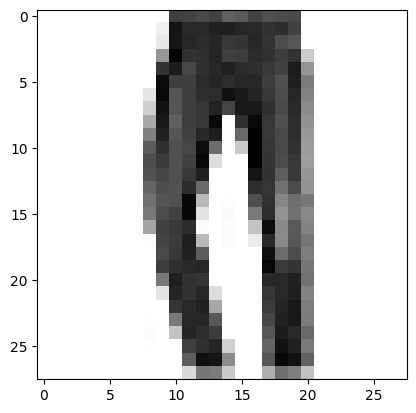

In [ ]:
digit = test_images[5]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [ ]:
# Se realiza la predicción de cada uno de los modelos para test_images[5] a
# partir de los datos de validación. Teniendo en cuenta que las etiquetas de test
# están en el formato one-hot encoding, se utiliza la función de numpy 'argmax'
# para mostrar el valor de la clase con la que se corresponde.
for idx, model in enumerate(models):
    prediction = model.predict(test_images[5].reshape(1, 28, 28, 1))
    predicted_label = np.argmax(prediction)
    print(f"Modelo {idx + 1} - Predicción para la 6ª imagen de prueba: {predicted_label}")


1/1 [==============================] - 0s 62ms/step
Modelo 1 - Predicción para la 6ª imagen de prueba: 1
1/1 [==============================] - 0s 65ms/step
Modelo 2 - Predicción para la 6ª imagen de prueba: 1
1/1 [==============================] - 0s 67ms/step
Modelo 3 - Predicción para la 6ª imagen de prueba: 1
1/1 [==============================] - 0s 70ms/step
Modelo 4 - Predicción para la 6ª imagen de prueba: 1
1/1 [==============================] - 0s 67ms/step
Modelo 5 - Predicción para la 6ª imagen de prueba: 1
1/1 [==============================] - 0s 78ms/step
Modelo 6 - Predicción para la 6ª imagen de prueba: 1
1/1 [==============================] - 0s 77ms/step
Modelo 7 - Predicción para la 6ª imagen de prueba: 1
1/1 [==============================] - 0s 48ms/step
Modelo 8 - Predicción para la 6ª imagen de prueba: 1


De acuerdo a los resultados obtenidos, todos los modelos devuelven el mismo valor y, por lo tanto, hay uniformidad respecto a las predicciones hechas para la sexta imagen del conjunto ```test_images```. Cada uno de los ocho modelos coincide en que la respuesta al problema es la segunda de las clases (el rango de los índices es de la forma ```[0, 9]```) => *Trouser*.

Si comparamos la imagen de la prenda previamente graficada con los resultados, vemos que, efectivamente, todos los modelos tienen la capacidad de identificar que se trata de un pantalón.

### **6. Graficar cómo de bien o de mal se comporta el modelo para cada uno de los 8 casos**

A continuación, se pone a prueba la eficiencia de los diferentes modelos que se han construido previamente mediante el estudio de las predicciones que estos hacen sobre las 10 primeras imágenes del dataset de validación ```test_images```. Para ello, nos valdremos de la representación y comparación gráfica de los resultados.

Las gráficas definidas incluirán la probabilidad que se asigna a cada una de las categorías de ropa de acuerdo a las predicciones de los diferentes modelos. Esto es, cada red neuronal le asigna un valor a las distintas etiquetas que representa la probabilidad de que la imagen examinada sea interpretada como dicha clase. Asimismo, se indicará si la predicción es correcta o, por el contrario, la red neuronal no ha logrado identificar la prenda de la imagen.

In [ ]:
# Definición de funciones

def plot_image(i, predictions_array, true_label, img):
  # Se encarga de graficar la imagen de test que se está evaluando. A los pies
  # de esta, se especifica la prenda que se ha predicho, el porcentaje de
  # probabilidad y la clase de la etiqueta correcta. El color del texto indicará
  # la veracidad de la predicción.

  class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.yticks([])
  plt.xticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  # Si el valor de la predicción coincide con la etiqueta verdadera, el color del
  # eje x, donde se especifica la clase predicha, será azul. De lo contrario, se
  # le asignará el color rojo.
  predicted_label = np.argmax(predictions_array)
  if predicted_label == np.argmax(true_label):
    color = 'blue'
  else:
    color = 'red'


  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                       100*np.max(predictions_array),
                                       class_names[np.argmax(true_label)]),
                                       color = color)

def plot_value_array(i, predictions_array, true_label):
  # Representación del diagrama de barras que incluye las probabilidades
  # calculadas para cada una de las posibles clases. Se destacará en color azul
  # si la clase predicha se corresponde con la verdadera, y en color rojo en
  # caso de que la predicción sea errónea.

  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color = '#777777')
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  # En cuanto a la especificación del color en el diagrama de barras, se le
  # asigna el color rojo a la predicción y el color azul a la etiqueta real;
  # de ser la primera cierta, prevalece el color azul sobre el rojo.
  thisplot[predicted_label].set_color('red')
  thisplot[np.argmax(true_label)].set_color('blue')


Predicciones modelo 1
313/313 [==============================] - 0s 1ms/step


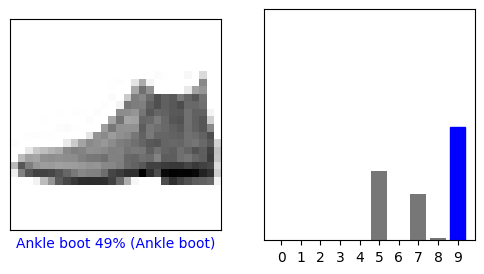

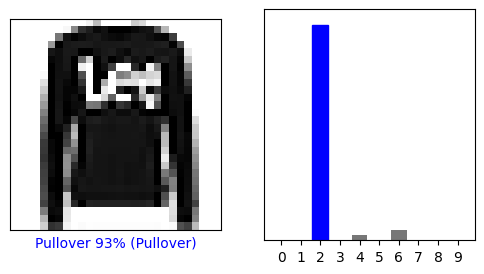

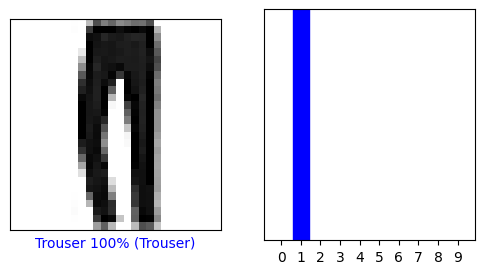

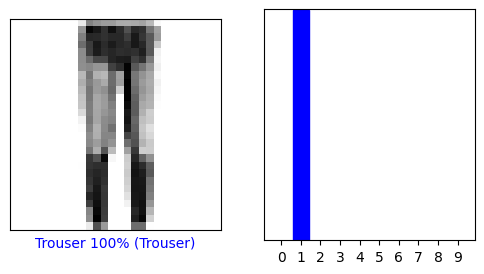

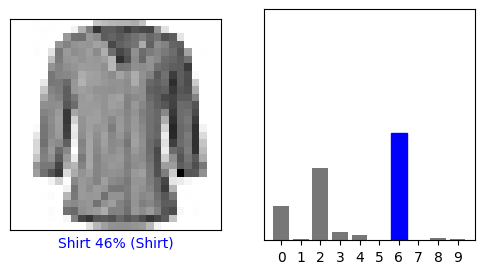

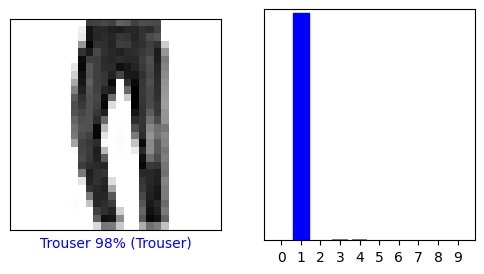

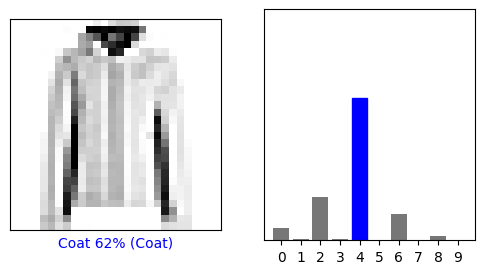

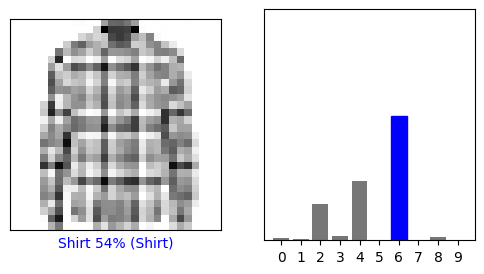

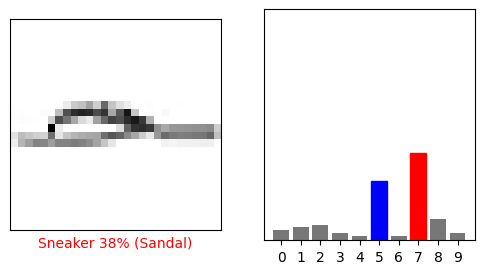

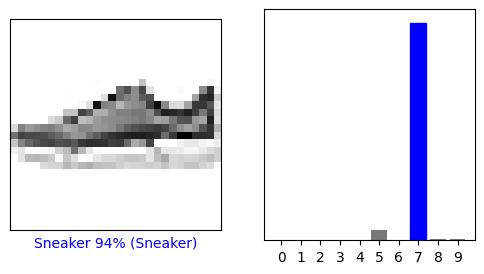

<Figure size 640x480 with 0 Axes>

Predicciones modelo 2
313/313 [==============================] - 1s 2ms/step


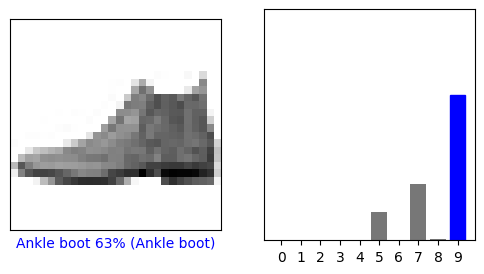

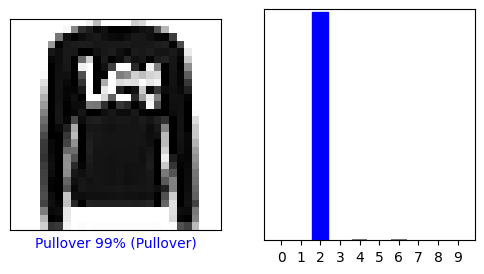

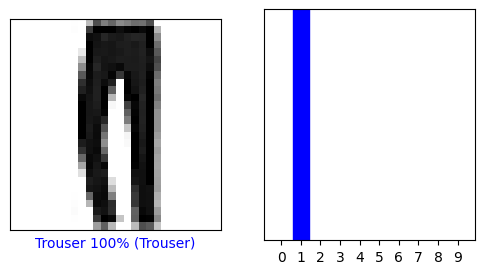

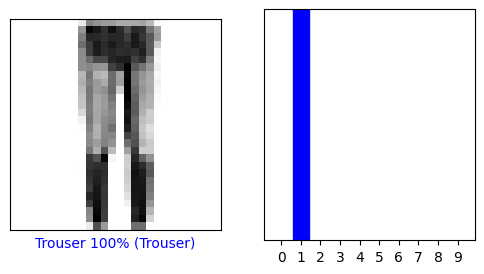

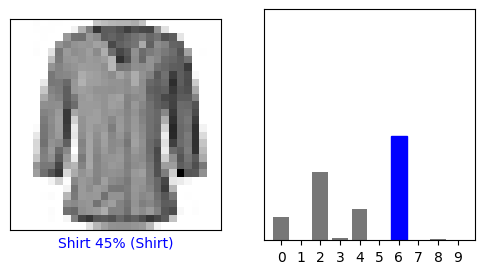

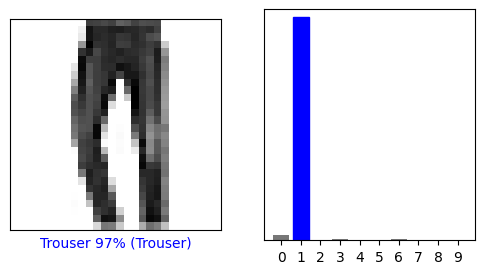

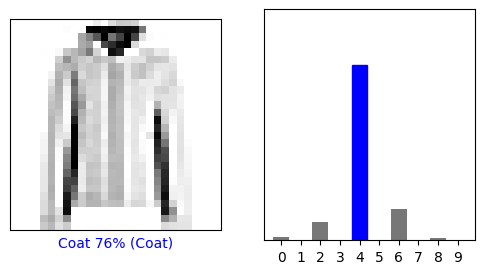

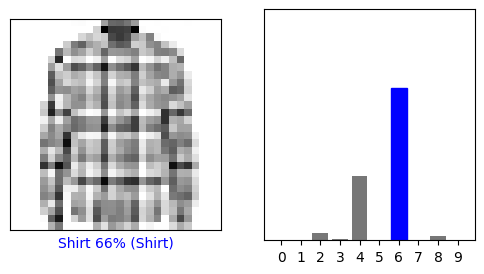

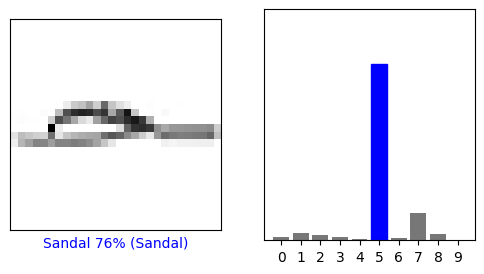

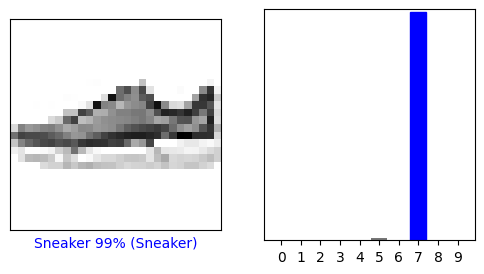

<Figure size 640x480 with 0 Axes>

Predicciones modelo 3
313/313 [==============================] - 1s 2ms/step


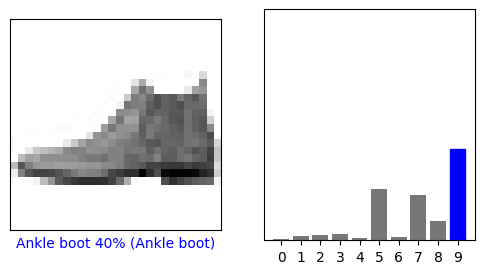

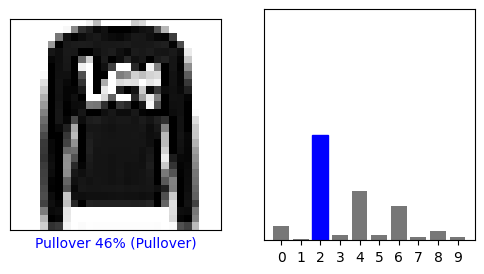

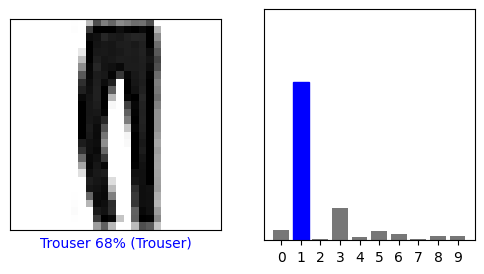

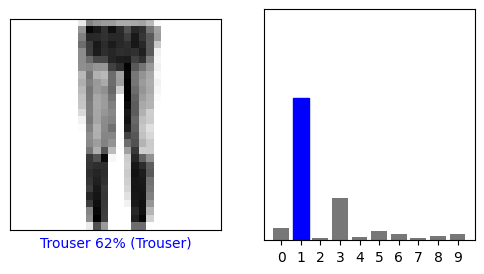

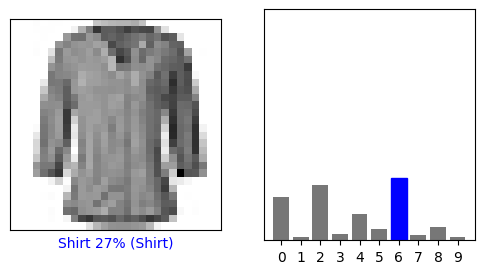

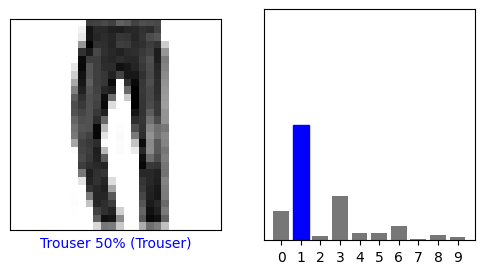

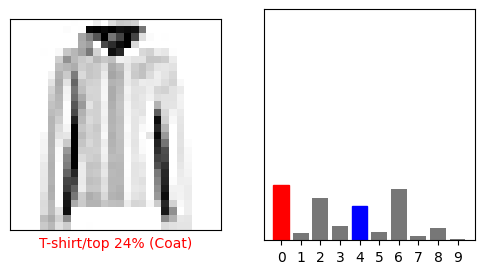

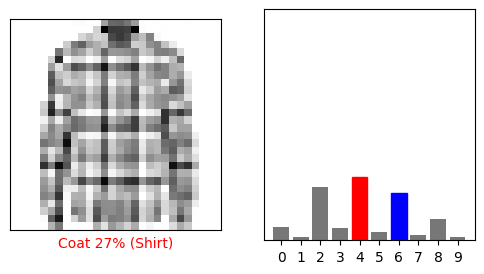

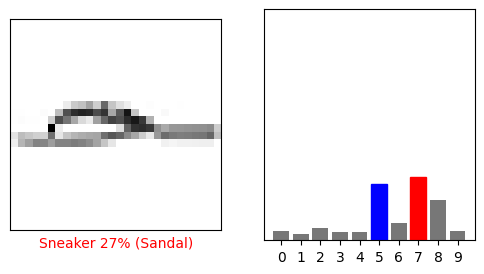

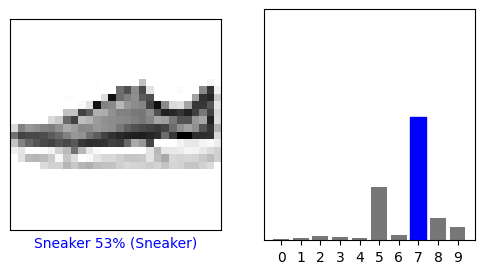

<Figure size 640x480 with 0 Axes>

Predicciones modelo 4
313/313 [==============================] - 1s 2ms/step


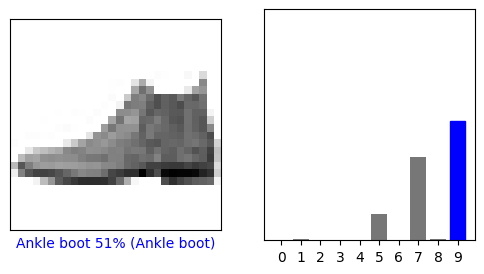

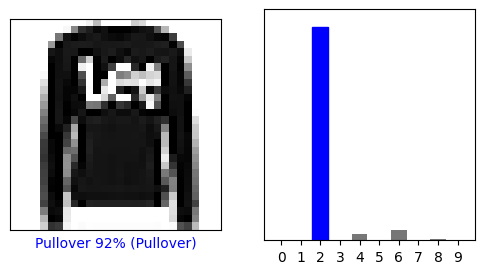

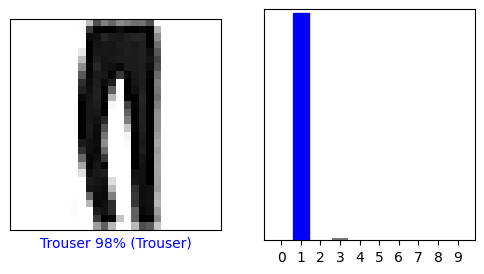

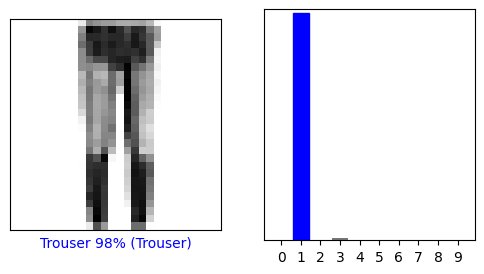

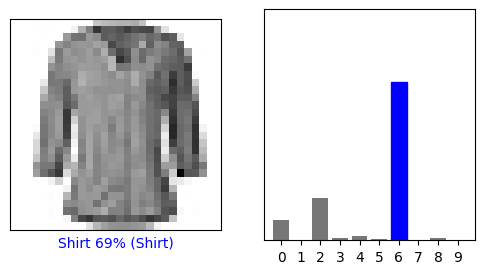

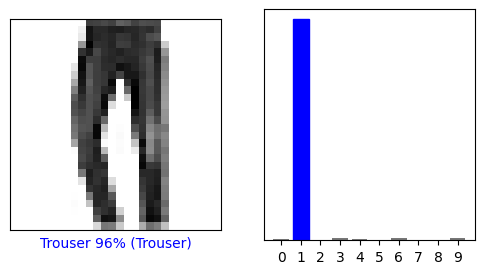

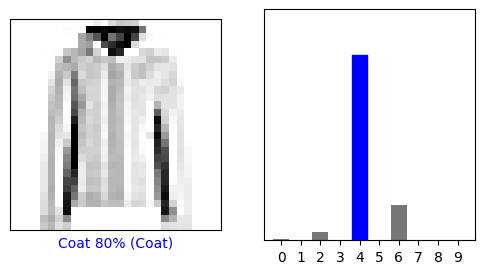

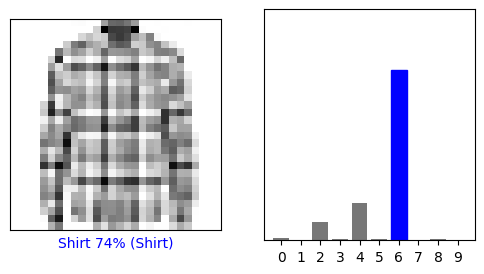

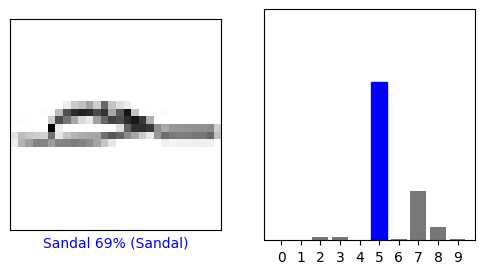

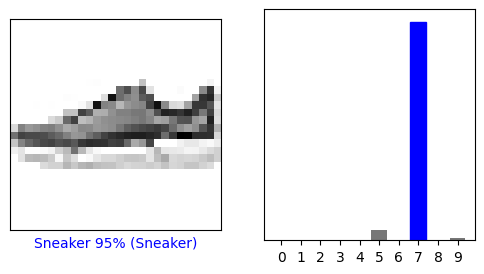

<Figure size 640x480 with 0 Axes>

Predicciones modelo 5
313/313 [==============================] - 1s 2ms/step


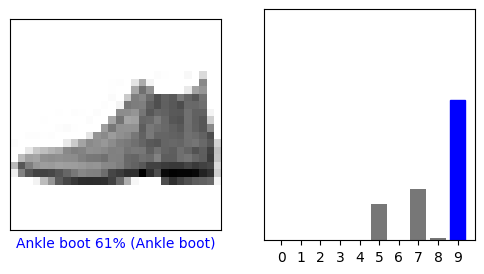

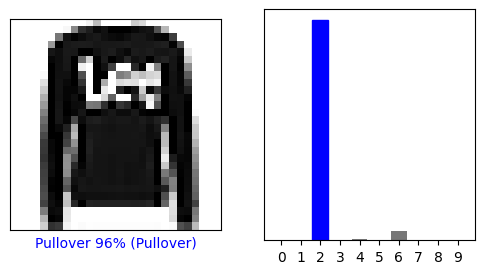

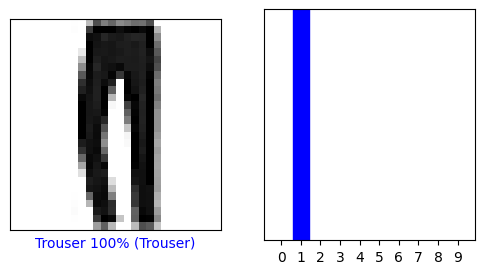

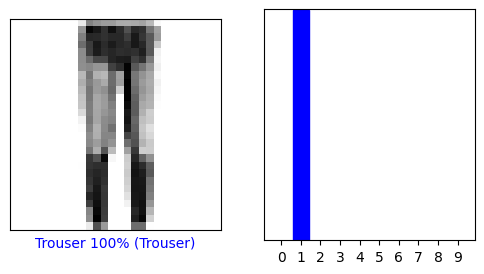

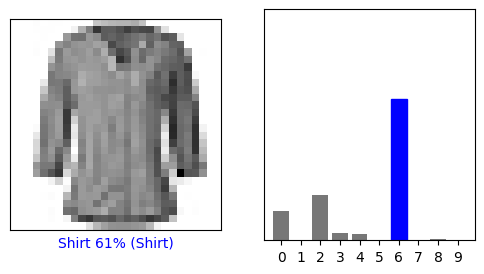

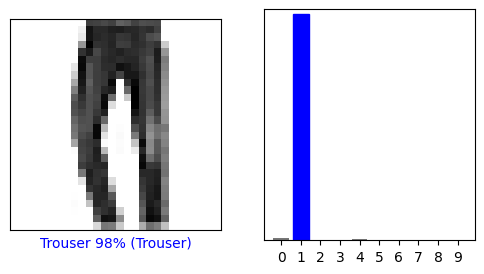

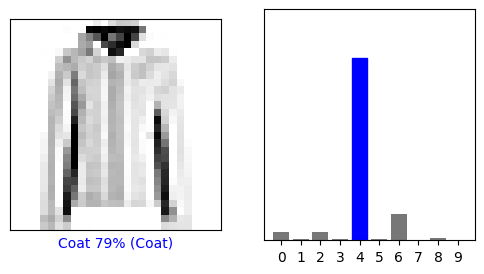

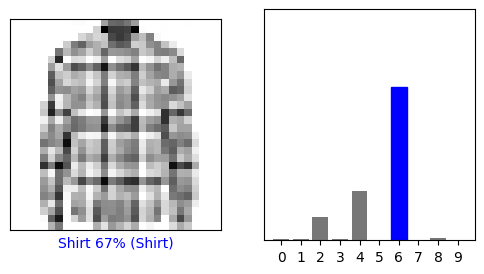

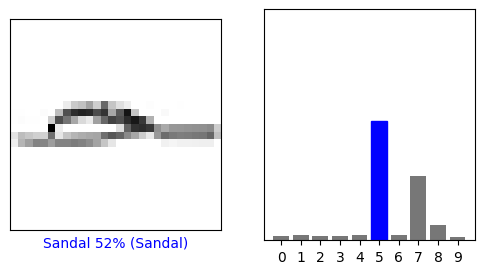

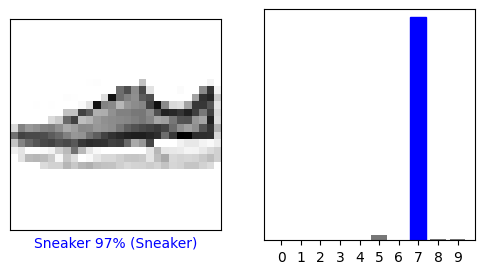

<Figure size 640x480 with 0 Axes>

Predicciones modelo 6
313/313 [==============================] - 1s 2ms/step


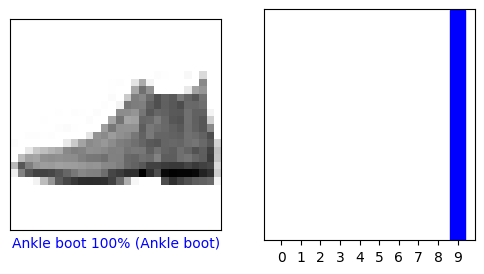

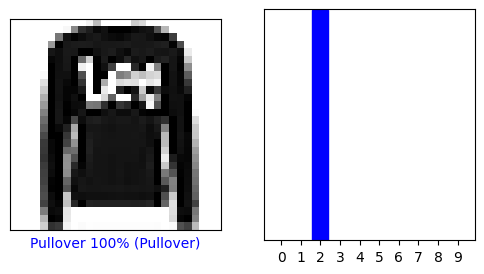

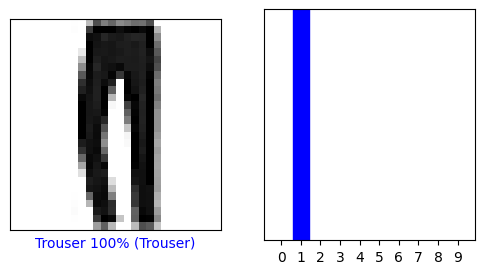

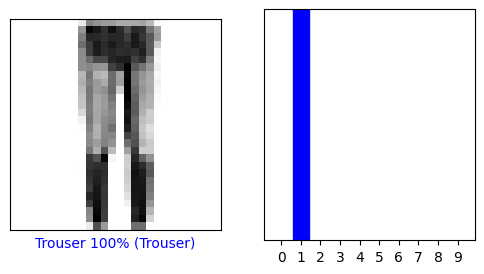

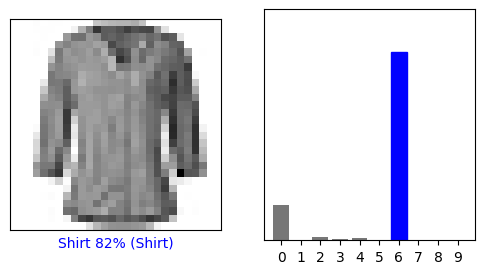

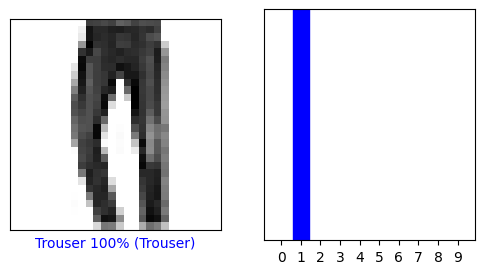

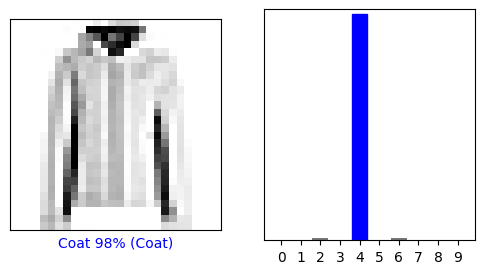

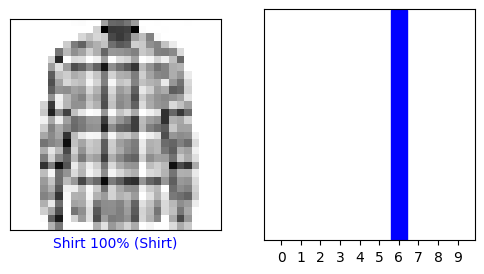

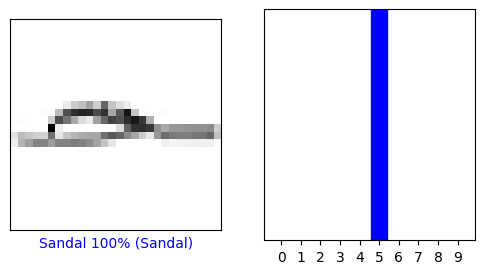

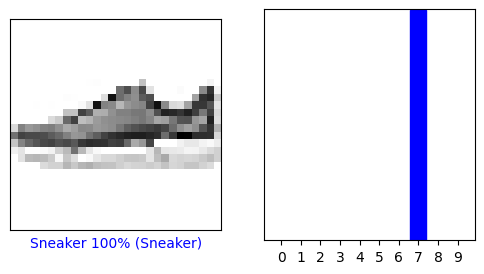

<Figure size 640x480 with 0 Axes>

Predicciones modelo 7
313/313 [==============================] - 1s 2ms/step


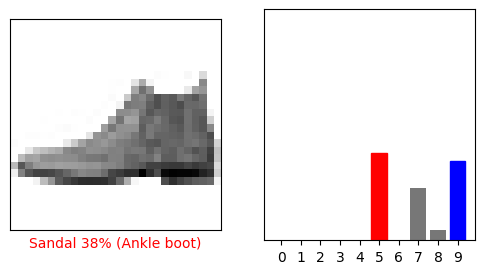

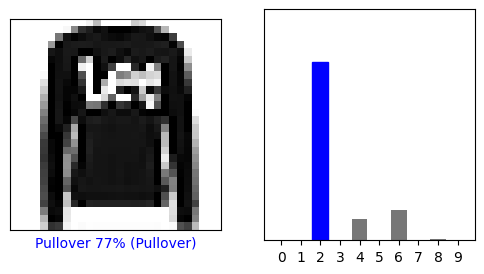

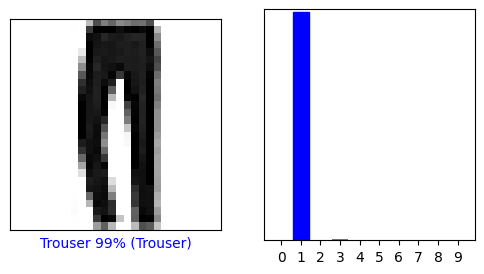

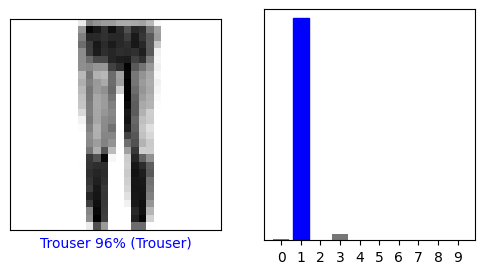

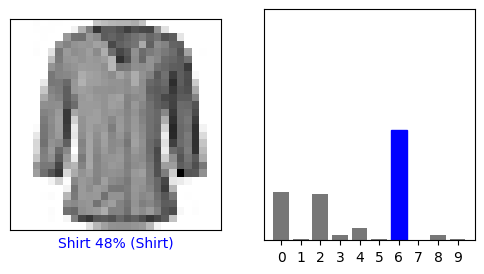

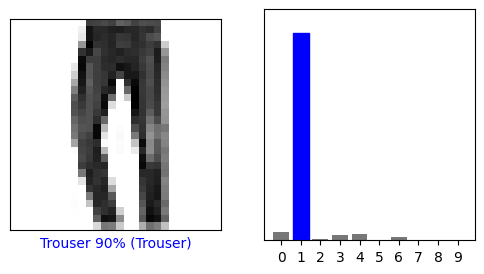

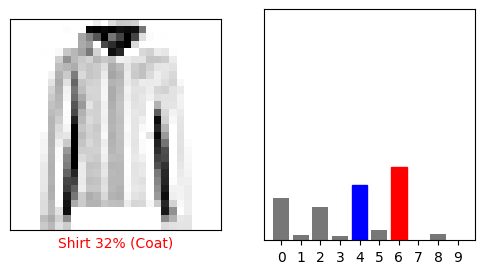

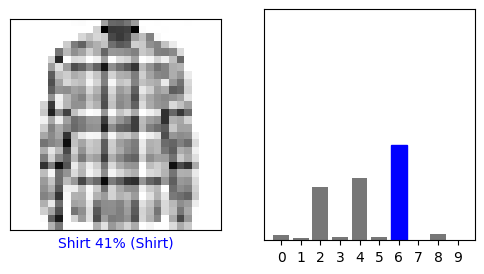

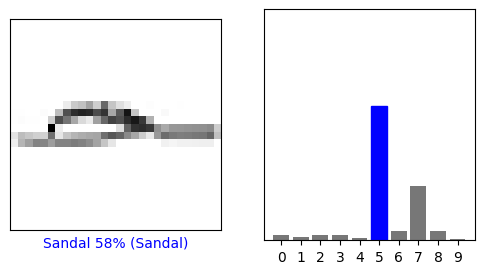

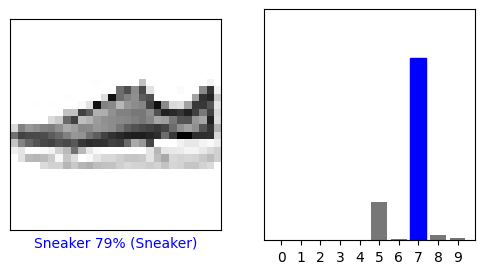

<Figure size 640x480 with 0 Axes>

Predicciones modelo 8
313/313 [==============================] - 1s 2ms/step


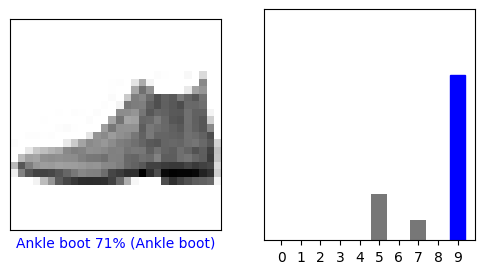

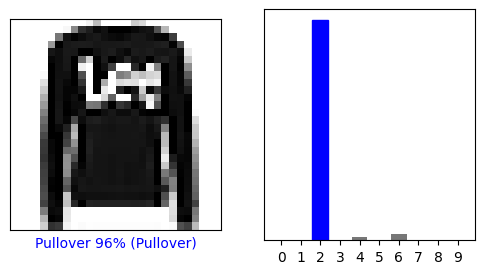

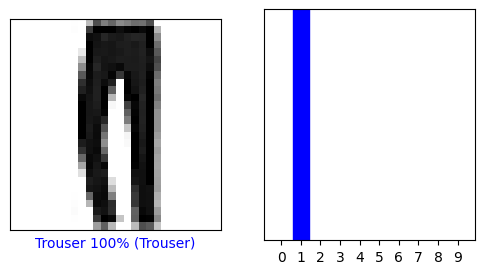

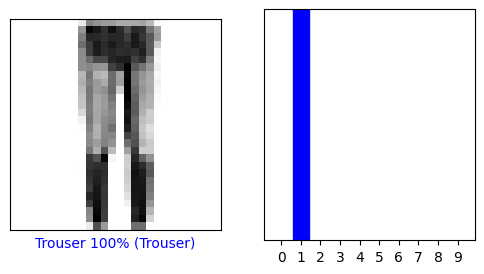

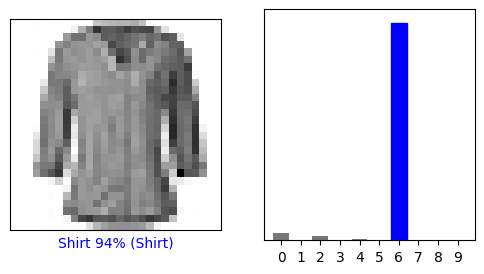

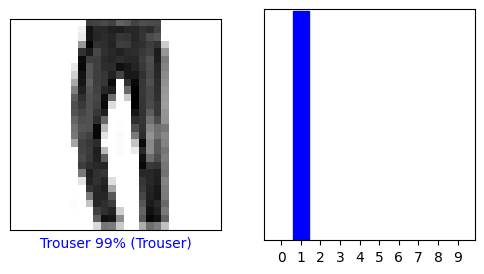

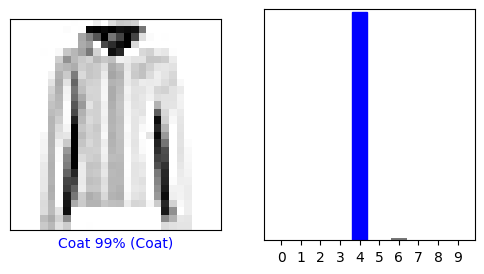

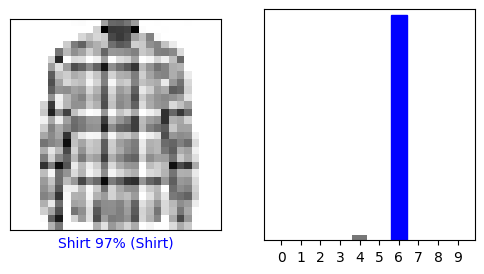

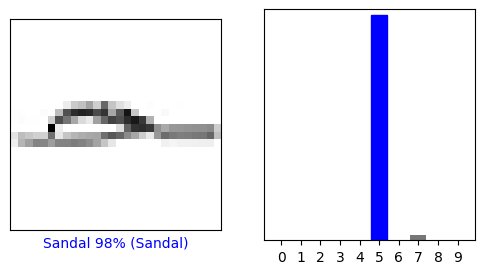

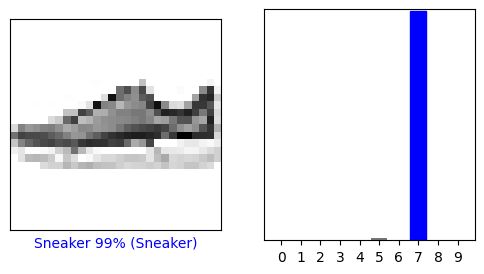

<Figure size 640x480 with 0 Axes>

In [ ]:
# Loop para cada modelo y visualización de las predicciones para las 10 primeras
# imágenes del conjunto de prueba.
for idx, model in enumerate(models):
    print(f"Predicciones modelo {idx+1}")
    predictions = model.predict(test_images)
    for i in range(10):
        plt.figure(figsize=(6, 3))
        plt.subplot(1, 2, 1)
        plot_image(i, predictions[i], test_labels, test_images)
        plt.subplot(1, 2, 2)
        plot_value_array(i, predictions[i], test_labels)
        plt.show()

    plt.tight_layout()
    plt.show()


**Reflexión y diferencias observadas**

En general, todos los modelos dan resultados relativamente favorables, con porcentajes de acierto bastante altos. No obstante, se observa que, de las 80 predicciones graficadas, seis no coinciden con sus respectivas etiquetas verdaderas. Conociendo que, de acuerdo a los resultados que se obtuvieron en el estudio de la precisión de cada uno de los ocho modelos, el modelo 3 y 7 son los que peor se comportan, analizamos su comportamiento sobre las imágenes:

- Modelo 1: Falla en 1 predicción.
- Modelo 3: Falla en 3 predicciones.
- Modelo 7: Falla en 2 predicciones.

Tanto el modelo 3 como el 7 tienen en común su función de activación (```sigmoid```), así como el algoritmo de optimización que emplean (```sgd```). Como se ha mencionado al comienzo del documento, la función sigmoide suele tender al desvanecimiento de gradiente, dificultando el entrenamiento de la red. Además, su algoritmia está orienta a la resolución de problemas de clasificación binaria, mientras que la cuestión de esta práctica exige la clasificación entre 10 clases distintas. Con respecto al optimizador, se conoce que, bien si converge relativamente rápido, ***SGD*** es menos estable. Asimismo, se sirve de una tasa de aprendizaje constante en vez de adaptativa, pudiendo influir en la calidad de los resultados.

Además, el modelo 1, que presentaba una sola predicción errónea, se compila con el optimizador ***SGD***, confirmando las desventajas que presenta una tasa de aprendizaje constante respecto a la eficiencia del algoritmo.

Por lo tanto, se puede estimar que, de todos los modelos estudiados, aquellos que combinan los dos parámetros mencionados resultan ser los menos eficientes para la resolución de nuestro problema.

Asimismo, se puede advertir que las categorías de ropa que dan mayores problemas en su identificación están relacionadas con el calzado y las prendas superiores (*'Coat'*, *'Shirt'*, *'Pullover'*).

Por último, se confirma que el comportamiento más óptimo sobre el conjunto de datos se presenta en los modelos 6 y 8, caracterizados por el empleo del algoritmo de optimización ***RMSProp***.  Así, se puede afirmar que la elección de los parámetros a la hora de compilar una red neuronal resulta clave para garantizar la eficiencia y utilidad en la resolución del problema.

### **7. Mejore el modelo usando el de la configuración del caso 3, pero cambiando el optimizador por ‘adam’ y la función de pérdida ‘sparse_categorical_crossentropy’. Buscar en internet las bases de dicho optimizador y función de pérdida, explícalos con tus propias palabras y plantea tus reflexiones respecto al resultado.**

Como se ha comprobado al comienzo del documento, uno de los modelos que presenta menor nivel de eficiencia y más demora en la convergencia es la tercera red neuronal. Conocemos que este modelo se compone de 10 neuronas en la primera capa y hace uso de la función de activación sigmoidea, que ha demostrado ofrecer peores resultados que la función ***ReLU***. Además, utiliza el algoritmo de optimización ***SGD***, común a los modelos que peor se comportan respecto a la base de datos de trabajo.

Por ello, se configurará una nueva red neuronal de este caso en la que se actualice su compilador, introduciendo la función de activación ```sparse_categorical_crossentropy``` y el optimizador ```adam``` con el fin de lograr mejoras en el comportamiento de la red de neuronas.

*   El algoritmo de optimización Adam, que significa "*Adaptive Moment Estimation*," es un método de **descenso de gradiente estocástico**. El optimizador combina las funciones de los algoritmos ***Momentum***, que permite evitar grandes oscilaciones en la dirección del gradiente valiéndose de los anteriores para actualizar los valores del modelo, y ***RMSProp***, que converge más rápido gracias a la introducción del concepto de tasa de aprendizaje adaptativa.
*   La diferencia principal entre las funciones de pérdida ```categorical_crossentropy``` y ```sparse_categorical_crossentropy``` se encuentra en el formato de las etiquetas de destino: la primera admite la codficación de estas en 'one-hot encoding' mientras que la segunda se utiliza cuando las etiquetas son una lista de números enteros.

Por lo tanto, conociendo que la nueva función de pérdida para el caso 3 será ```sparse_categorical_crossentropy```, utilizamos la función ```argmax``` para revertir nuestras etiquetas, que estaban codificadas en 'one-hot encoding', y obtener la lista de números enteros que se corresponden con la clase.

In [ ]:
# Construir el nuevo modelo mejorado
model_3_update = Sequential([
    Flatten(input_shape=(28, 28, 1)), # Capa de entrada para aplanar las imágenes
    Dense(10, activation='sigmoid'),  # Capa densa con 10 neuronas y activación
                                      # sigmoid (porque usamos
                                      # sparse_categorical_crossentropy)
    Dense(10, activation='softmax')
    ])

# Compilar el modelo con optimizador Adam y función de pérdida
# sparse_categorical_crossentropy
model_3_update.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
                       metrics=['accuracy'])

# Entrenar el modelo
model_3_update.fit(train_images, np.argmax(train_labels, axis = 1), epochs=5,
                   batch_size=64, validation_split=0.2)

# Evaluar el modelo en el conjunto de prueba
test_loss, test_accuracy = model_3_update.evaluate(test_images,
                           np.argmax(test_labels, axis = 1), verbose=2)
print("Precisión en el conjunto de prueba:", test_accuracy)


Epoch 1/5
750/750 [==============================] - 4s 4ms/step - loss: 1.3211 - accuracy: 0.6702 - val_loss: 0.9098 - val_accuracy: 0.7763
Epoch 2/5
750/750 [==============================] - 3s 3ms/step - loss: 0.7685 - accuracy: 0.7905 - val_loss: 0.6622 - val_accuracy: 0.8117
Epoch 3/5
750/750 [==============================] - 2s 3ms/step - loss: 0.6046 - accuracy: 0.8196 - val_loss: 0.5623 - val_accuracy: 0.8227
Epoch 4/5
750/750 [==============================] - 2s 3ms/step - loss: 0.5316 - accuracy: 0.8319 - val_loss: 0.5157 - val_accuracy: 0.8308
Epoch 5/5
750/750 [==============================] - 2s 3ms/step - loss: 0.4908 - accuracy: 0.8389 - val_loss: 0.4826 - val_accuracy: 0.8360
313/313 - 1s - loss: 0.5078 - accuracy: 0.8307 - 782ms/epoch - 2ms/step
Precisión en el conjunto de prueba: 0.8306999802589417


**Reflexión sobre el resultado**

Las diferencias más notables entre los resultados para el caso 3 anterior y el actualizado se observan en la velocidad de convergencia, que se reduce entre 1 y 2 milisegundos por paso. Además, se aprecian mejoras en la precisión con un incremento de casi el 25% con respecto a la red neuronal original (de aproximadamente un 67% a casi un 83%).

Como se ha mencionado antes, el optimizador ***Adam*** destaca por su capacidad de convergencia gracias a la actualización constante de la tasa de aprendizaje, lo que permite que el compilador se adapte con mayor exactitud a los datos del problema. Por lo tanto, teniendo en cuenta que el algoritmo de optimización ***SGD*** mantiene esta tasa constante, cabe esperar que la precisión del problema aumente y se obtengan resultados más rápidamente.

Luego se vuelve a comprobar una vez más las ventajas que presenta el empleo de una **tasa de aprendizaje adaptativa** en el optimizador de la red en cuanto al rendimiento y la precisión en los resultados.

### **Conclusiones finales**

En el presente estudio, se ha llevado a cabo una evaluación exhaustiva de diversos modelos de redes neuronales convolucionales (CNN) aplicados al problema de clasificación de imágenes utilizando el conjunto de datos Fashion MNIST. A través de esta investigación, se han analizado los efectos de diferentes optimizadores y funciones de activación en el rendimiento de los modelos.

En términos de optimizadores, se observó que el rendimiento de los modelos variaba significativamente según el optimizador utilizado. Los modelos entrenados con el optimizador SGD mostraron resultados menos eficientes. Esto se atribuye a la naturaleza de la tasa de aprendizaje constante en SGD, que no se ajusta dinámicamente a los cálculos realizados durante el algoritmo. Como resultado, los cálculos se alejan cada vez más de la precisión deseada, lo que afecta negativamente al rendimiento del modelo. Por otro lado, los modelos que utilizaron el optimizador RMSprop, con su tasa de aprendizaje adaptativa, demostraron una convergencia más rápida y una eficiencia superior en comparación con SGD. Además, el optimizador Adam, que combina una tasa de aprendizaje adaptativa con la edición de oscilaciones del gradiente, mostró un rendimiento sólido y estable en el modelo 3 al que fue aplicado.

En cuanto a las funciones de activación, se encontró que ReLU (Rectified Linear Unit) supera a la función sigmoidea en este contexto específico. Esto se debe a que la función sigmoidea puede experimentar problemas de desvanecimiento del gradiente, lo que significa que en ciertas iteraciones, los gradientes se vuelven tan pequeños que las actualizaciones de peso son prácticamente nulas. Esto puede conducir a que la red neuronal no aprenda correctamente los patrones en los datos. ReLU, al ser lineal para valores positivos, evita este problema y ha demostrado ser una opción más robusta para las capas ocultas en las CNN.

Un hallazgo clave en esta investigación es la importancia de que los algoritmos sean adaptables a las variaciones en los datos y las iteraciones. Los optimizadores y las funciones de activación que tienen en cuenta estas variaciones muestran un rendimiento superior. La capacidad de ajustarse a los cambios dinámicos en los datos durante el entrenamiento es fundamental para que un modelo de red neuronal aprenda de manera efectiva y generalice bien a nuevos datos.

En resumen, esta investigación resalta la necesidad de elegir cuidadosamente los componentes de un modelo de red neuronal, como el optimizador y la función de activación, para lograr un rendimiento óptimo. Además, se subraya la importancia de la adaptabilidad y la capacidad de ajuste dinámico de estos componentes para enfrentar las complejidades de los conjuntos de datos del mundo real.

En cuanto al trabajo en equipo, la colaboración efectiva entre los miembros del grupo ha representado un componente de gran importancia en el desarrollo de este proyecto. Un desafío significativo que hemos enfrentado al trabajar en el entorno de Jupiter Notebook en Google Colab fue la inicial suposición de que podríamos realizar ediciones simultáneas sin comprometer el trabajo de los demás colaboradores. Sin embargo, pronto comprendimos que esta suposición era incorrecta, lo que subraya la importancia de una comunicación constante y efectiva. Esta comunicación se convirtió en un elemento fundamental para garantizar que el progreso de cada integrante del equipo se mantuviera intacto y que todos pudieran contribuir al documento final.

La distribución de tareas dentro del equipo no siguió un patrón rígido; en su lugar, todos las integrantes participaron activamente tanto en la elaboración del código como en la redacción de la memoria. En la fase de desarrollo del código, utilizamos ejemplos y recursos que habíamos adquirido durante nuestras clases, así como valiéndonos de recursos disponibles en Internet.

Es relevante subrayar que gran parte del trabajo se llevó a cabo en la presencia conjunta de los tres integrantes del equipo, ya sea de manera física o a través de comunicación telefónica o virtual. Esta modalidad no solo promovió un flujo de trabajo coordinado y eficaz, sino que también facilitó la resolución de obstáculos y desafíos de manera más rápida.